# Crash course for Bio Data Scientists

This crash course aims to help my students at FHWN. 

It is not meant to be a complete course but rather a quick introduction to the most important concepts.

This crash course is based on "Programming with Python" from the University of Natural Resources and Life Sciences, Vienna (BOKU), written by Drazen Petrov and Yerko Escalona.


In [ ]:
# Check if running on Google Colab
try:
    from google.colab import drive  # type: ignore  # noqa: F401

    is_google_colab = True
except ImportError:
    is_google_colab = False

# If on Google Colab, install the package
if is_google_colab:
    %pip install numpy==1.26.4 scipy==1.14.1 pandas==2.2.3 matplotlib==3.9.2


In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [3]:
# Print versions of each library
print(f"Running on Google Colab: {is_google_colab}")
print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"scipy=={scipy.__version__}")
print(f"matplotlib=={plt.matplotlib.__version__}")


Running on Google Colab: False
numpy==1.26.4
pandas==2.2.3
scipy==1.14.1
matplotlib==3.9.2


## Overview

Let's talks about:

- Numpy
- Matplotlib
- Scipy
- Pandas

## Numpy 

[NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python

Python objects:	
- high-level number objects: integers, floating point
- containers: lists (costless insertion and append), dictionaries (fast lookup)

NumPy provides:	
- extension package to Python for multi-dimensional arrays
- closer to hardware (efficiency)
- designed for scientific computation (convenience)
- Also known as array oriented computing


### Integration problem

We will use the trapezoidal rule to calculate the integral of the following function:

$$f(x) = 0.007x^3 + 0.01x^2 - 0.2x + 1$$

see https://en.wikipedia.org/wiki/Trapezoidal_rule

In [4]:
from IPython.display import Image

Image(url="https://upload.wikimedia.org/wikipedia/commons/1/10/WikiTrap.gif")

### Algorithm
##### Idea:
split the x range (that is of length N) into N-1 segments. for each segment, calculate the average of the y values and based on that, the area of the trapez defined by the x axis and the 2 points of the segment

##### Algorithm:

1. initialize a sum (integral) to 0 
1. repeat: generate an index (i) that starts with 0 and increases by 1 until N-1
    1. assign x1 = x[i]
    1. assign x2 = x[i+1]
    1. assign y1 = y[i]
    1. assign y2 = y[i+1]
    1. area = (x2 - x1) * (y1 + y2) / 2
    1. add area to the sum



In [5]:
# data generation
def fnc(x):
    """Function to generate polynomial data."""
    return 0.007 * x * x * x + 0.01 * x * x - 0.2 * x + 1


x = [(i - 500) / 2 for i in range(1000)]
y = [fnc(i) for i in x]

In [6]:
%%time
# Python implementation
integral_sum = 0
for i in range(len(x) - 1):
    x1 = x[i]
    x2 = x[i + 1]
    y1 = y[i]
    y2 = y[i + 1]
    area = (x2 - x1) * (y1 + y2) / 2
    integral_sum += area

print(integral_sum)

49855.70896874991
CPU times: total: 15.6 ms
Wall time: 3.98 ms


In [7]:
%%time
# Numpy implementation
y = np.array(y)
dx = np.diff(x)
avg_y = (y[:-1] + y[1:]) / 2
np.sum(dx * avg_y)

CPU times: total: 0 ns
Wall time: 0 ns


49855.7089687502

In [8]:
%%time
# Numpy implementation II
np.trapz(y, x)

CPU times: total: 0 ns
Wall time: 998 μs


49855.7089687502


advantages of using Numpy for this specific case:

- in order to create `x` and `y` variables, you don't need `for` loops
- you have already implemented the trapezoidal rule algorithm
- it is precise

### creating an array

In [9]:
import numpy as np

a = np.array([0, 1, 2, 3, 4, 5])  # creating an array from a list
a

array([0, 1, 2, 3, 4, 5])

In [10]:
# get the dimension and shape of the array
print(a.ndim)
print(a.shape)

1
(6,)


In [11]:
# create a 2D array
b = np.array([[0, 1, 2], [3, 4, 5]])
b

array([[0, 1, 2],
       [3, 4, 5]])

In [12]:
# array properties
print(b.ndim)
print(b.shape)

2
(2, 3)


In [13]:
b.T  # Transpose

array([[0, 3],
       [1, 4],
       [2, 5]])

### arange / linspace

In [14]:
# similar to range, in NumPy it is arange
np.arange(0, 12.5, 2.5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [15]:
# but in NumPy you have linear space
np.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [16]:
# create an array of ones with shape (3,3)
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [17]:
# create an array of zeros with shape (2,3)
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [18]:
# create an array of random numbers with shape (3,2)
np.random.random((3, 2))  # shape = 3x2

array([[0.01572202, 0.17066653],
       [0.79523486, 0.95698653],
       [0.86680808, 0.57849896]])

### indexing

In [19]:
# indexing works similarly to lists
c = np.arange(10)
print(c)
print(c[0])  # first element
print(c[1])  # second
print(c[-1])  # last
print(c[1:5])  # 2nd to 5th
print(c[::2])  # every second element

[0 1 2 3 4 5 6 7 8 9]
0
1
9
[1 2 3 4]
[0 2 4 6 8]


In [20]:
# but how to index 2D arrays?
d = np.arange(1, 10).reshape((3, 3))  # same as d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [21]:
print(d[0, 0])  # 1st row 1st column
print(d[1, 0])  # 2nd row 1st column
print(d[0, 1])  # 1st row 2nd column
print(d[-1, -1])  # last row last column
## list style indexing
print(d[0][0])  # 1st row 1st column

1
4
2
9
1


In [22]:
print(d[1, :])  # 2nd row (: means all)
print(d[:, 1])  # 2nd column (: means all)

[4 5 6]
[2 5 8]


In [23]:
print(d[1:3, 1:3])  # 2nd and 3rd row and 2nd and 3rd column

[[5 6]
 [8 9]]


In [24]:
d[(0, 2), :]  # 1st and 3rd rows; all columns

array([[1, 2, 3],
       [7, 8, 9]])

### operations

In [25]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [26]:
a - 1

array([[0, 1],
       [2, 3]])

In [27]:
a * 2

array([[2, 4],
       [6, 8]])

In [28]:
a * a

array([[ 1,  4],
       [ 9, 16]])

In [29]:
# dot product
vec1 = np.array([0, 1, 2])
vec2 = np.array([2, 1, 0])
vec1.dot(vec2), np.dot(vec1, vec2)

(1, 1)

In [30]:
# logical operations
a = np.array([[1, 2], [3, 4]])
print(a)

[[1 2]
 [3 4]]


In [31]:
a == 2

array([[False,  True],
       [False, False]])

In [32]:
a[a == 2]

array([2])

In [33]:
a > 1

array([[False,  True],
       [ True,  True]])

In [34]:
a[a > 1]

array([2, 3, 4])

In [35]:
# get properties of the array
a = np.array([[1, 2], [3, 4]])
print(a.sum())
print(a.mean())
print(a.std())
print(a.max())
print(a.min())

10
2.5
1.118033988749895
4
1


In [36]:
print(a.sum(axis=0))  # applied to columns
print(a.sum(axis=1))  # applied to rows

[4 6]
[3 7]


In [37]:
np.sum(a), np.mean(a), np.std(a), np.max(a), np.min(a)  # other way of doing the same

(10, 2.5, 1.118033988749895, 4, 1)

In [38]:
np.median(a), np.var(a)  # median and variance

(2.5, 1.25)

In [39]:
np.nan, np.inf

(nan, inf)

### MATPLOTLIB

[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.



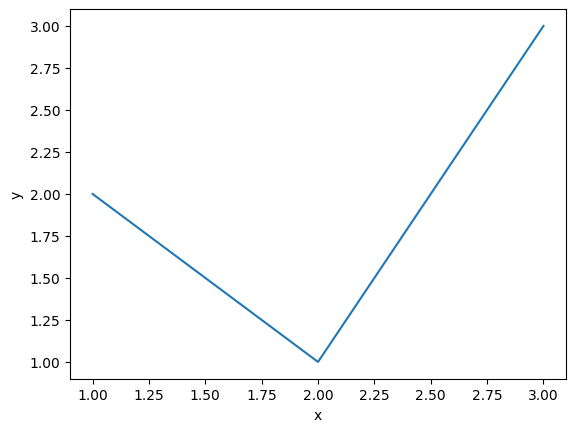

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3])
y = np.array([2, 1, 3])

# simple plot
plt.plot(x, y)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

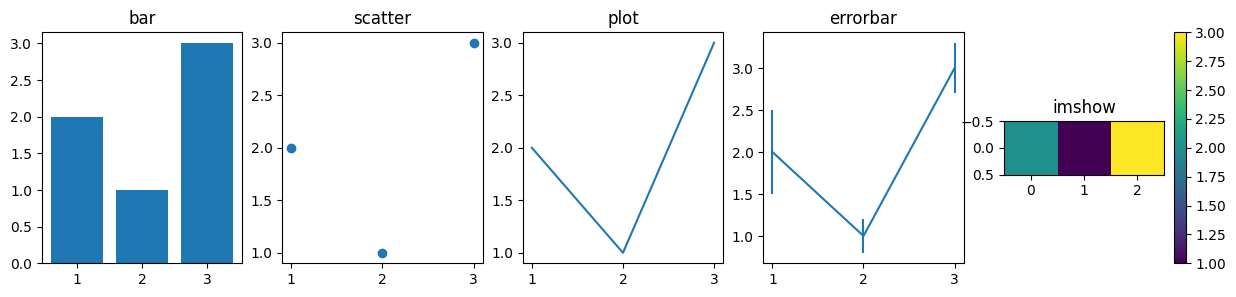

In [41]:
x = np.array([1, 2, 3])
y = np.array([2, 1, 3])
e = np.array([0.5, 0.2, 0.3])


plt.figure(figsize=(15, 3))

# generating more subplots
plt.subplot(151)
plt.title("bar")
plt.bar([str(i) for i in x], y)  # bar plot

plt.subplot(152)
plt.title("scatter")
plt.scatter(x, y)  # scatter plot

plt.subplot(153)
plt.title("plot")
plt.plot(x, y)  # simple plot

plt.subplot(154)
plt.title("errorbar")
plt.errorbar(x, y, e)  # simple plot with error bars

plt.subplot(155)
plt.title("imshow")  # im plot
plt.imshow([y])
plt.colorbar()

plt.show()
plt.show()

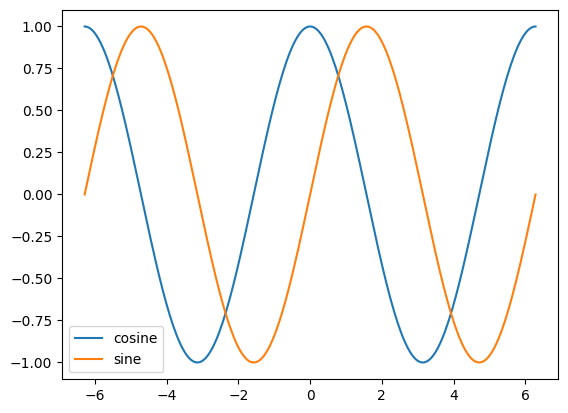

In [42]:
# NumPy + Matplotlib
x = np.linspace(-np.pi * 2, np.pi * 2, 256)  # generate x values
plt.plot(x, np.cos(x), label="cosine")  # generate and plot cosine
plt.plot(x, np.sin(x), label="sine")  # generate and plot sine
plt.legend()
plt.show()

## Scipy package 

[SciPy](https://scipy.org/) is organized into subpackages covering different scientific computing domains.

These are summarized in the following table:

| Subpackage  | Description                                        |
|-------------|----------------------------------------------------|
| cluster     | Clustering algorithms                              |
| constants   | Physical and mathematical constants                |
| fftpack     | Fast Fourier Transform routines                    |
| integrate   | Integration and ordinary differential equation solvers |
| interpolate | Interpolation and smoothing splines                |
| io          | Input and Output                                   |
| linalg      | Linear algebra                                     |
| ndimage     | N-dimensional image processing                     |
| odr         | Orthogonal distance regression                     |
| optimize    | Optimization and root-finding routines             |
| signal      | Signal processing                                  |
| sparse      | Sparse matrices and associated routines             |
| spatial     | Spatial data structures and algorithms              |
| special     | Special functions                                  |
| stats       | Statistical distributions and functions             |



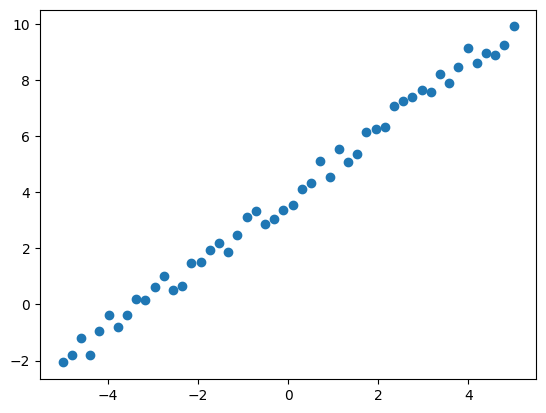

In [43]:
# linear regression
from scipy.stats import linregress


def f(x):
    """Function to generate a line."""
    return 1.2 * x + 3.4


x = np.linspace(-5, 5, 50)
y = f(x) + np.random.random(50)  # adding noise to each point

plt.scatter(x, y)
plt.show()

In [44]:
res_lin_reg = linregress(x, y)
print(res_lin_reg)

LinregressResult(slope=1.1848401656256942, intercept=3.880116794107751, rvalue=0.9963419763874543, pvalue=6.083310573782079e-53, stderr=0.014668018306572026, intercept_stderr=0.043198420568921404)


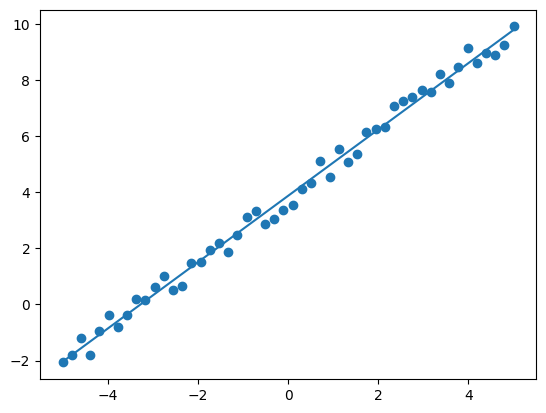

In [45]:
plt.scatter(x, y)
y_fit = x * res_lin_reg.slope + res_lin_reg.intercept
plt.plot(x, y_fit)
plt.show()

## Pandas

"[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language."<br>


but why Pandas?

### Numpy indexing and limitations

In [ ]:
%%writefile population.csv
country, population, capital
Austria, 8902600, Vienna
Germany, 83149300, Berlin
Croatia, 4076246, Zagreb
Chile, 17574003, Santiago

Overwriting population.csv


In [47]:
import numpy as np

dt = np.dtype([("country", "S20"), ("population", "i4"), ("capital", "S20")])
data = np.loadtxt("population.csv", skiprows=1, delimiter=",", dtype=dt)
data

array([(b'Austria',  8902600, b'Vienna'),
       (b'Germany', 83149300, b'Berlin'),
       (b'Croatia',  4076246, b'Zagreb'),
       (b'Chile', 17574003, b'Santiago')],
      dtype=[('country', 'S20'), ('population', '<i4'), ('capital', 'S20')])

In [48]:
data["country"]

array([b'Austria', b'Germany', b'Croatia', b'Chile'], dtype='|S20')

In [49]:
data["population"]

array([ 8902600, 83149300,  4076246, 17574003])

You can access to the columns, but if you want to ask for the population in a certain country.

In [50]:
data["population"][data["country"] == b"Croatia"]

array([4076246])

The code is getting ugly.

### basics

In [51]:
import pandas as pd

In [52]:
data = pd.read_csv("population.csv", delimiter=",")
data

,country,population,capital
0,Austria,8902600,Vienna
1,Germany,83149300,Berlin
2,Croatia,4076246,Zagreb
3,Chile,17574003,Santiago


In [53]:
data.set_index("country")  # set index

,population,capital
country,,
Austria,8902600,Vienna
Germany,83149300,Berlin
Croatia,4076246,Zagreb
Chile,17574003,Santiago


In [54]:
data = pd.read_csv("population.csv", delimiter=",", index_col=0)
data

,population,capital
country,,
Austria,8902600,Vienna
Germany,83149300,Berlin
Croatia,4076246,Zagreb
Chile,17574003,Santiago


In [55]:
data.shape

(4, 2)

In [56]:
data.head(2)  # 5 by default

,population,capital
country,,
Austria,8902600,Vienna
Germany,83149300,Berlin


In [57]:
print("columns\t", data.columns)
print("keys\t", data.keys())
print("index\t", data.index)

columns	 Index(['population', 'capital'], dtype='object')
keys	 Index(['population', 'capital'], dtype='object')
index	 Index(['Austria', 'Germany', 'Croatia', 'Chile'], dtype='object', name='country')


### indexing, slicing, attribute access

In [58]:
# dictionary style
data["population"]

country
Austria     8902600
Germany    83149300
Croatia     4076246
Chile      17574003
Name: population, dtype: int64

In [59]:
# object
data.population

country
Austria     8902600
Germany    83149300
Croatia     4076246
Chile      17574003
Name: population, dtype: int64

In [60]:
data["population"]["Austria"]

8902600

In [61]:
data.population.Austria

8902600

In [62]:
# indexing with loc
data.loc["Germany"]

population    83149300
capital         Berlin
Name: Germany, dtype: object

In [63]:
data.loc["Germany", "capital"]

'Berlin'

In [64]:
data.loc["Germany", :]

population    83149300
capital         Berlin
Name: Germany, dtype: object

In [65]:
data.loc[["Croatia", "Chile"], "capital"]

country
Croatia      Zagreb
Chile      Santiago
Name: capital, dtype: object

In [66]:
# indexing with loc
data.iloc[1]

population    83149300
capital         Berlin
Name: Germany, dtype: object

In [67]:
data.iloc[1:, 1]

country
Germany      Berlin
Croatia      Zagreb
Chile      Santiago
Name: capital, dtype: object

In [68]:
data.iloc[0:2, [0, 1]]

,population,capital
country,,
Austria,8902600,Vienna
Germany,83149300,Berlin


In [69]:
data[:2]

,population,capital
country,,
Austria,8902600,Vienna
Germany,83149300,Berlin


### assigning values

In [70]:
data_orig = data.copy()
df = data
df

,population,capital
country,,
Austria,8902600,Vienna
Germany,83149300,Berlin
Croatia,4076246,Zagreb
Chile,17574003,Santiago


In [71]:
print(df.iloc[0, 0])
df.iloc[0, 0] = 10000000
print(df.iloc[0, 0])
df

8902600
10000000


,population,capital
country,,
Austria,10000000,Vienna
Germany,83149300,Berlin
Croatia,4076246,Zagreb
Chile,17574003,Santiago


In [72]:
# df.newcol = 100 this does not work!
df["newcol"] = "a"
df

,population,capital,newcol
country,,,
Austria,10000000,Vienna,a
Germany,83149300,Berlin,a
Croatia,4076246,Zagreb,a
Chile,17574003,Santiago,a


In [73]:
data

,population,capital,newcol
country,,,
Austria,10000000,Vienna,a
Germany,83149300,Berlin,a
Croatia,4076246,Zagreb,a
Chile,17574003,Santiago,a


In [74]:
data_orig

,population,capital
country,,
Austria,8902600,Vienna
Germany,83149300,Berlin
Croatia,4076246,Zagreb
Chile,17574003,Santiago


### some simple operations

In [75]:
df = data_orig.copy()

In [ ]:
# NOTE: future versions of pandas will raise the following warning
# FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated.
# The idea is to explicitly say that the mean should be calculated only for numeric columns
# ignoring NaN values (if any)
df.mean(numeric_only=True)

population    28425537.25
dtype: float64

In [77]:
df.min()

population    4076246
capital        Berlin
dtype: object

In [78]:
df.max()

population    83149300
capital         Zagreb
dtype: object

In [79]:
df.median(numeric_only=True)

population    13238301.5
dtype: float64

In [80]:
df.describe()

,population
count,4.000000e+00
mean,2.842554e+07
std,3.690745e+07
min,4.076246e+06
25%,7.696012e+06
50%,1.323830e+07
75%,3.396783e+07
max,8.314930e+07


In [81]:
df.sort_values("population")

,population,capital
country,,
Croatia,4076246,Zagreb
Austria,8902600,Vienna
Chile,17574003,Santiago
Germany,83149300,Berlin


In [82]:
df.sort_values("population", ascending=False)

,population,capital
country,,
Germany,83149300,Berlin
Chile,17574003,Santiago
Austria,8902600,Vienna
Croatia,4076246,Zagreb


In [83]:
df.drop(["Germany", "Chile", "Croatia"])

,population,capital
country,,
Austria,8902600,Vienna


In [84]:
df.drop("capital", axis=1)

,population
country,
Austria,8902600
Germany,83149300
Croatia,4076246
Chile,17574003


### Plot

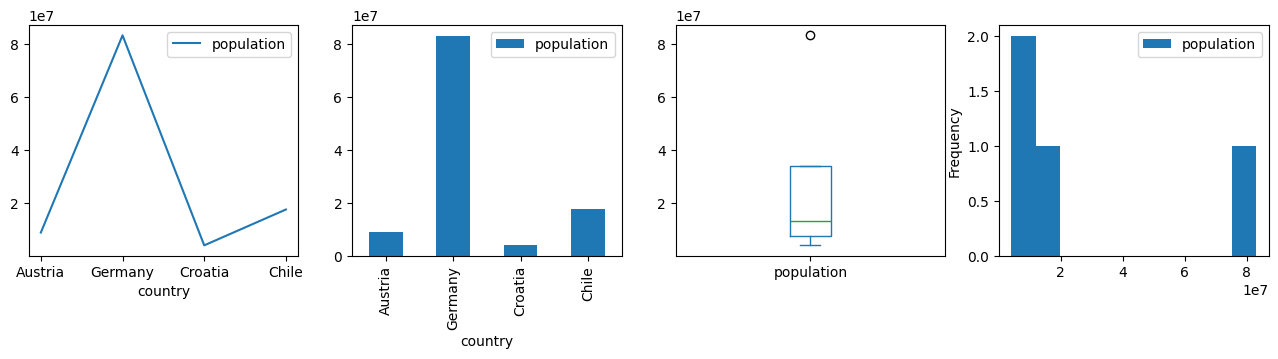

In [85]:
fig, ax = plt.subplots(figsize=(16, 3), ncols=4, nrows=1)
df.plot(ax=ax[0])
df.plot.bar(ax=ax[1])
df.plot.box(ax=ax[2])
df.plot.hist(ax=ax[3])
plt.show()